Background
The COVID-19 pandemic, caused by the SARS-CoV-2 virus, emerged in late 2019 and rapidly spread globally, leading to significant health, economic, and social impacts. This unprecedented health crisis highlighted the crucial role of data analysis in managing such pandemics. By meticulously tracking and analyzing data on confirmed cases, recoveries, and deaths, policymakers and health professionals can make informed decisions to control the spread of the virus and allocate resources effectively.

Question 1: Data Loading
Q1.1: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?

In [3]:
import pandas as pd # Importing the pandas,numpy,matplot,seaborn library to access all avaialbe methods
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading datasets, my all datasets file are avalaibe on google drive
confirmed_Cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_confirmed_v1.csv')
deaths_cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_deaths_v1.csv')
recovered_cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_recovered_v1.csv')



Check the volume of data in all Datasets, means available rows and columns

In [4]:
confirmed_Cases.shape # shape of the data in confirmed cases is (276, 498)
deaths_cases.shape # shape of the data in confirmed cases is (277, 498)
recovered_cases.shape # shape of the data in recovered Cases: (262, 498)

print("Confirmed Cases:", confirmed_Cases.shape)
print("Deaths Cases:   ", deaths_cases.shape)
print("Recovered Cases:", recovered_cases.shape)


Confirmed Cases: (276, 498)
Deaths Cases:    (277, 498)
Recovered Cases: (262, 498)


Question 3 & 4: Data Cleaning and Preparation, Handling Missing Data

As observed data not in proper format, we will first restructure it to a more readable layout and then will do transformation




In [5]:
confirmed_Cases.head(5)

# this is the wide format, which will keep wider on daily basis so will do col to row means unpivot
# we have two methods one is melt() column to row(unpivot), and pivot() rows to columns, will use melt here as per our need
confirmed_Cases=pd.melt(
                          confirmed_Cases, # here we are calling our dataframe
                          id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], # to keep the same these columns
                          var_name='Date', # to rename the new column for dates
                          value_name='Confirmed' # store values repestive country/resion date wise
                          )
confirmed_Cases['Date']=pd.to_datetime(confirmed_Cases['Date'])
confirmed_Cases.head(10)

<ipython-input-5-cf1f4ad6b889>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_Cases['Date']=pd.to_datetime(confirmed_Cases['Date'])


,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0


In [6]:
confirmed_Cases.isnull().sum() # now will handle NaN/null values in datasets in datasets

,0
Province/State,93860
Country/Region,0
Lat,988
Long,988
Date,0
Confirmed,0


In [8]:
confirmed_Cases['Province/State'].fillna('All Provinces',inplace=True) #we are using fillna() method to replace NaN values with a specified value
confirmed_Cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,988
Long,988
Date,0
Confirmed,0


In [9]:
confirmed_Cases['Lat']=confirmed_Cases['Lat'].fillna(0)
confirmed_Cases['Long']=confirmed_Cases['Long'].fillna(0)
confirmed_Cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0


In [10]:
confirmed_Cases.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Confirmed,int64


Save the the transformed confirmed_Cases datasets

In [11]:
confirmed_Cases.to_csv('/content/drive/MyDrive/confirmed_Cases.csv', index=False) # save the dataset

**Second - Deaths Dataset transformation **

In [19]:
deaths_cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_deaths_v1.csv')
deaths_cases.head(5) # seems first invalid row in dataset

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
2,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
3,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
4,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127


In [20]:
# as we have wrong header so mentioned that header started with 1 index
deaths_cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_deaths_v1.csv',header=1)
deaths_cases.head(5) # seems first invalid row in dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [21]:
deaths_cases=pd.melt(
                          deaths_cases, # here we are calling our dataframe
                          id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], # to keep the same these columns
                          var_name='Date', # to rename the new column for dates
                          value_name='Deaths'
)

#deaths_cases.head(5)

deaths_cases['Date']=pd.to_datetime(deaths_cases['Date'])
deaths_cases.dtypes


<ipython-input-21-81fa440ff5c9>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_cases['Date']=pd.to_datetime(deaths_cases['Date'])


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Deaths,float64


In [22]:
deaths_cases['Deaths']=deaths_cases['Deaths'].astype(int)
deaths_cases.dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [23]:
deaths_cases.isnull().sum()

,0
Province/State,93860
Country/Region,0
Lat,988
Long,988
Date,0
Deaths,1


In [24]:
missing_confirmed = deaths_cases[deaths_cases['Deaths'].isnull()]
print(missing_confirmed)

      Province/State Country/Region      Lat    Long       Date  Deaths
24566            NaN        Algeria  28.0339  1.6596 2020-04-20     NaN


Replace NaN with 0

In [25]:
deaths_cases['Deaths']=deaths_cases['Deaths'].fillna(0)
deaths_cases.isnull().sum()

,0
Province/State,93860
Country/Region,0
Lat,988
Long,988
Date,0
Deaths,0


In [26]:
deaths_cases['Province/State']=deaths_cases['Province/State'].fillna('All Provinces')
deaths_cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,988
Long,988
Date,0
Deaths,0


In [27]:
deaths_cases['Lat']=deaths_cases['Lat'].fillna(0)
deaths_cases['Long']=deaths_cases['Long'].fillna(0)
deaths_cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Deaths,0


In [28]:
deaths_cases['Deaths']=deaths_cases['Deaths'].astype(int)
deaths_cases.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Deaths,int64


In [29]:
deaths_cases.to_csv('/content/drive/MyDrive/deaths_cases.csv', index=False) # save the dataset

**Third- recovered Dataset transformation **

In [30]:
recovered_cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_deaths_v1.csv')
recovered_cases.head(5) # seems first invalid row in dataset

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
2,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
3,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
4,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127


In [31]:
# as we have wrong header so mentioned that header started with 1 index
recovered_cases=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/CaseStudy/covid_19_deaths_v1.csv',header=1)
recovered_cases.head(5) # seems first invalid row in dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [32]:
recovered_cases=pd.melt(
    recovered_cases, # here we are calling our dataframe
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], # to keep the same these columns
    var_name='Date', # to rename the new column for dates
    value_name='Recovered'
)

recovered_cases['Date']=pd.to_datetime(recovered_cases['Date'])

recovered_cases.head(5)



<ipython-input-32-24b672426161>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_cases['Date']=pd.to_datetime(recovered_cases['Date'])


,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0


In [33]:
recovered_cases.isnull().sum() # now will handle NaN/null values in datasets in datasets

,0
Province/State,93860
Country/Region,0
Lat,988
Long,988
Date,0
Recovered,1


In [34]:
recovered_cases['Province/State']=recovered_cases['Province/State'].fillna('All Provinces')
recovered_cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,988
Long,988
Date,0
Recovered,1


In [35]:
recovered_cases['Lat']=recovered_cases['Lat'].fillna(0)
recovered_cases['Long']=recovered_cases['Long'].fillna(0)
recovered_cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Recovered,1


In [36]:
recovered_cases['Recovered']=recovered_cases['Recovered'].fillna(0)
recovered_cases['Recovered']=recovered_cases['Recovered'].astype(int)
recovered_cases.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Recovered,int64


In [37]:
recovered_cases.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Recovered,0


In [38]:
recovered_cases.to_csv('/content/drive/MyDrive/recovered_cases.csv', index=False) # save the dataset

Q2.2: Generate plots of confirmed cases over time for the top countries.

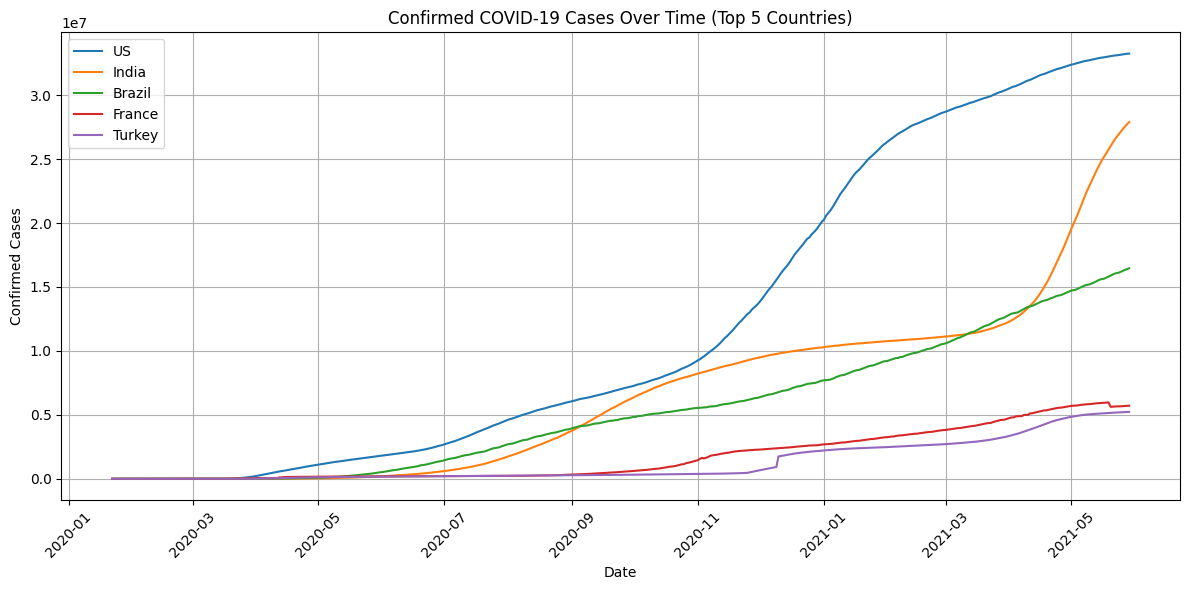

In [39]:
# Step 1: Get total confirmed cases per country (latest date)
latest_date = confirmed_Cases['Date'].max()
top_countries = (
    confirmed_Cases[confirmed_Cases['Date'] == latest_date]
    .groupby('Country/Region')['Confirmed']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 2: Filter confirmed_Cases for just those countries
top_data = confirmed_Cases[confirmed_Cases['Country/Region'].isin(top_countries)]

# Step 3: Group by Country and Date and sum values
grouped = top_data.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()

# Step 4: Plot
plt.figure(figsize=(12, 6))

for country in top_countries:
    country_data = grouped[grouped['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('Confirmed COVID-19 Cases Over Time (Top 5 Countries)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q2.3: Generate plots of confirmed cases over time for China.

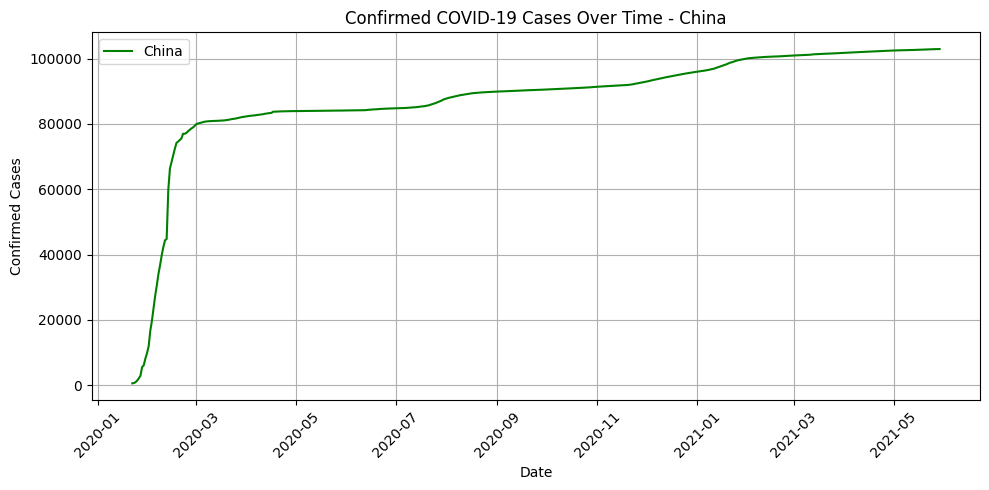

In [41]:
# Step 1: Filter confirmed cases for China
china_data = confirmed_Cases[confirmed_Cases['Country/Region'] == 'China']

# Step 2: Group by Date and sum across provinces (if any)
china_daily = china_data.groupby('Date')['Confirmed'].sum().reset_index()

# Step 3: Plot
plt.figure(figsize=(10, 5))
plt.plot(china_daily['Date'], china_daily['Confirmed'], color='green', label='China')

plt.title('Confirmed COVID-19 Cases Over Time - China')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Question 5: Independent Dataset Analysis**

Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

In [43]:
confirmed_Cases.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0
2,All Provinces,Algeria,28.03390,1.659600,2020-01-22,0
3,All Provinces,Andorra,42.50630,1.521800,2020-01-22,0
4,All Provinces,Angola,-11.20270,17.873900,2020-01-22,0


In [44]:
# Group daily confirmed cases by country and date
grouped = confirmed_Cases.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()

# Define the countries
countries = ['Germany', 'France', 'Italy']

# Analyze peak daily new cases
for country in countries:
    country_data = grouped[grouped['Country/Region'] == country].copy()
    country_data.sort_values('Date', inplace=True)

    # Calculate daily new cases
    country_data['Daily New'] = country_data['Confirmed'].diff().fillna(0)

    # Find peak
    peak_row = country_data.loc[country_data['Daily New'].idxmax()]
    peak_date = peak_row['Date'].strftime('%Y-%m-%d')
    peak_val = int(peak_row['Daily New'])

    print(f"{country}: Peak of {peak_val} new cases on {peak_date}")


Germany: Peak of 49044 new cases on 2020-12-30
France: Peak of 117900 new cases on 2021-04-11
Italy: Peak of 40902 new cases on 2020-11-13


Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?

In [45]:
# Filter data for December 31, 2020
target_date = pd.to_datetime('2020-12-31')

# Get confirmed cases
confirmed_on_date = confirmed_Cases[confirmed_Cases['Date'] == target_date]
recovered_on_date = recovered_cases[recovered_cases['Date'] == target_date]

# Aggregate totals by country
confirmed_total = confirmed_on_date.groupby('Country/Region')['Confirmed'].sum()
recovered_total = recovered_on_date.groupby('Country/Region')['Recovered'].sum()

# Pick countries
for country in ['Canada', 'Australia']:
    confirmed = confirmed_total.get(country, 0)
    recovered = recovered_total.get(country, 0)

    recovery_rate = (recovered / confirmed) * 100 if confirmed > 0 else 0
    print(f"{country} - Recovery Rate: {recovery_rate:.2f}%")


Canada - Recovery Rate: 2.70%
Australia - Recovery Rate: 3.20%


Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [46]:
# Use the latest date from the dataset
latest_date = confirmed_Cases['Date'].max()

# Filter confirmed and deaths for Canada on latest date
confirmed_canada = confirmed_Cases[
    (confirmed_Cases['Country/Region'] == 'Canada') &
    (confirmed_Cases['Date'] == latest_date)
]

deaths_canada = deaths_cases[
    (deaths_cases['Country/Region'] == 'Canada') &
    (deaths_cases['Date'] == latest_date)
]

# Group by province
confirmed_by_province = confirmed_canada.groupby('Province/State')['Confirmed'].sum()
deaths_by_province = deaths_canada.groupby('Province/State')['Deaths'].sum()

# Merge into one DataFrame
province_summary = pd.DataFrame({
    'Confirmed': confirmed_by_province,
    'Deaths': deaths_by_province
}).fillna(0)

# Calculate death rate
province_summary['Death Rate (%)'] = (province_summary['Deaths'] / province_summary['Confirmed']) * 100
province_summary['Death Rate (%)'] = province_summary['Death Rate (%)'].replace([float('inf'), -float('inf')], 0).fillna(0)

# Get highest and lowest death rate provinces
highest = province_summary['Death Rate (%)'].idxmax()
lowest = province_summary['Death Rate (%)'].idxmin()

# Print result
print(f"Latest Date in Dataset: {latest_date.strftime('%Y-%m-%d')}")
print(f"Highest Death Rate: {highest} - {province_summary.loc[highest, 'Death Rate (%)']:.2f}%")
print(f"Lowest Death Rate: {lowest} - {province_summary.loc[lowest, 'Death Rate (%)']:.2f}%")


Latest Date in Dataset: 2021-05-29
Highest Death Rate: Quebec - 3.01%
Lowest Death Rate: Diamond Princess - 0.00%


Q6.2: What is the total number of deaths reported per country up to the current date?

In [50]:
# Get the latest date
latest_date = deaths_cases['Date'].max()

# Filter rows for the latest date
latest_deaths = deaths_cases[deaths_cases['Date'] == latest_date]

# Check actual column name — replace 'Deaths' below with your real column if needed
# Group and sum
total_deaths_per_country = latest_deaths.groupby('Country/Region')['Deaths'].sum().reset_index()

# Rename and sort
total_deaths_per_country.columns = ['Country', 'Total Deaths']
total_deaths_per_country = total_deaths_per_country.sort_values(by='Total Deaths', ascending=False)

# Print top 10
print(f"Total deaths per country as of {latest_date.strftime('%Y-%m-%d')}:")
print(total_deaths_per_country.head(10))


Total deaths per country as of 2021-05-29:
            Country  Total Deaths
179              US        594306
23           Brazil        461057
79            India        325972
115          Mexico        223455
183  United Kingdom        128037
85            Italy        126002
143          Russia        118781
62           France        109518
66          Germany         88413
37         Colombia         87747


Q6.3: What are the top 5 countries with the highest average daily deaths?

In [52]:
# Ensure 'Date' column is in datetime format
deaths_cases['Date'] = pd.to_datetime(deaths_cases['Date'])

# Group by 'Country/Region' and 'Date', summing the 'Deaths' column
daily_deaths = deaths_cases.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()

# Calculate the average daily deaths per country
average_daily_deaths = daily_deaths.groupby('Country/Region')['Deaths'].mean().reset_index()

# Rename columns for clarity
average_daily_deaths.columns = ['Country', 'Average Daily Deaths']

# Sort the results in descending order
average_daily_deaths = average_daily_deaths.sort_values(by='Average Daily Deaths', ascending=False)

# Display the top 5 countries
print("Top 5 countries with the highest average daily COVID-19 deaths:")
print(average_daily_deaths.head(5))


Top 5 countries with the highest average daily COVID-19 deaths:
            Country  Average Daily Deaths
179              US         250234.906883
23           Brazil         147013.327935
79            India          89935.410931
115          Mexico          87057.647773
183  United Kingdom          58560.327935


Q6.4: How have the total deaths evolved over time in the United States?

In [53]:
# Filter United States and group
us_deaths = deaths_cases[deaths_cases['Country/Region'] == 'United States']
daily_total = us_deaths.groupby('Date')['Deaths'].sum().reset_index()

# Check how many rows
print(f"Rows after grouping: {len(daily_total)}")
print(daily_total.tail(10))


Rows after grouping: 0
Empty DataFrame
Columns: [Date, Deaths]
Index: []


Question 7: Data Merging

Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [55]:
# Step 1: Merge confirmed and deaths
merge1 = pd.merge(
    confirmed_Cases,
    deaths_cases,
    on=['Country/Region', 'Province/State', 'Date'],
    how='outer'
)

# Step 2: Merge the above with recovered
merged_data = pd.merge(
    merge1,
    recovered_cases,
    on=['Country/Region', 'Province/State', 'Date'],
    how='outer'
)

# Step 3: Fill missing values with 0 (if desired)
merged_data[['Confirmed', 'Deaths', 'Recovered']] = merged_data[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

# Optional: sort by country and date
merged_data.sort_values(by=['Country/Region', 'Date'], inplace=True)

# Final merged view
merged_data.head()


,Province/State,Country/Region,Lat_x,Long_x,Date,Confirmed,Lat_y,Long_y,Deaths,Lat,Long,Recovered
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0,33.93911,67.709953,0,33.93911,67.709953,0
1,All Provinces,Afghanistan,33.93911,67.709953,2020-01-23,0,33.93911,67.709953,0,33.93911,67.709953,0
2,All Provinces,Afghanistan,33.93911,67.709953,2020-01-24,0,33.93911,67.709953,0,33.93911,67.709953,0
3,All Provinces,Afghanistan,33.93911,67.709953,2020-01-25,0,33.93911,67.709953,0,33.93911,67.709953,0
4,All Provinces,Afghanistan,33.93911,67.709953,2020-01-26,0,33.93911,67.709953,0,33.93911,67.709953,0


Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [56]:
# Step 1: Create 'Month' column in YYYY-MM format
merged_data['Month'] = merged_data['Date'].dt.to_period('M').astype(str)

# Step 2: Group by Country and Month
monthly_summary = merged_data.groupby(['Country/Region', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Step 3: Preview the data
print("Monthly summary of confirmed, deaths, and recoveries (sample):")
print(monthly_summary.head(10))


Monthly summary of confirmed, deaths, and recoveries (sample):
  Country/Region    Month  Confirmed  Deaths  Recovered
0    Afghanistan  2020-01          0       0          0
1    Afghanistan  2020-02          6       0          0
2    Afghanistan  2020-03       1164      27         27
3    Afghanistan  2020-04      27074     890        890
4    Afghanistan  2020-05     225674    5007       5007
5    Afghanistan  2020-06     750944   15016      15016
6    Afghanistan  2020-07    1077247   33518      33518
7    Afghanistan  2020-08    1163297   42101      42101
8    Afghanistan  2020-09    1163868   42987      42987
9    Afghanistan  2020-10    1245948   46287      46287


Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

In [57]:
# Define countries of interest
selected_countries = ['United States', 'Italy', 'Brazil']

# Filter the monthly summary for the selected countries
monthly_selected = monthly_summary[monthly_summary['Country/Region'].isin(selected_countries)]

# Sort for better readability
monthly_selected = monthly_selected.sort_values(by=['Country/Region', 'Month'])

# Display the result
print("Monthly summary for United States, Italy, and Brazil:")
print(monthly_selected.head(15))  # Show first few rows


Monthly summary for United States, Italy, and Brazil:
    Country/Region    Month  Confirmed   Deaths  Recovered
391         Brazil  2020-01          0        0          0
392         Brazil  2020-02          5        0          0
393         Brazil  2020-03      37127      976        976
394         Brazil  2020-04    1048506    66571      66571
395         Brazil  2020-05    7944285   509030     509030
396         Brazil  2020-06   28161222  1353392    1353392
397         Brazil  2020-07   62641865  2370476    2370476
398         Brazil  2020-08  102903896  3345405    3345405
399         Brazil  2020-09  132059962  4004352    4004352
400         Brazil  2020-10  160991539  4732789    4732789
401         Brazil  2020-11  176837421  4986319    4986319
402         Brazil  2020-12  218249737  5702548    5702548
403         Brazil  2021-01  261187142  6483686    6483686
404         Brazil  2021-02  276456100  6713342    6713342
405         Brazil  2021-03  361059664  8826515    8826515


Question 8: Combined Data Analysis

Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [58]:
# Step 1: Filter data for 2020
merged_data['Date'] = pd.to_datetime(merged_data['Date'])  # Ensure correct dtype
data_2020 = merged_data[merged_data['Date'].dt.year == 2020]

# Step 2: Group by country and sum confirmed & deaths
summary_2020 = data_2020.groupby('Country/Region')[['Confirmed', 'Deaths']].sum()

# Step 3: Calculate death rate
summary_2020['Death Rate (%)'] = (summary_2020['Deaths'] / summary_2020['Confirmed']) * 100
summary_2020 = summary_2020.replace([float('inf'), -float('inf')], 0).fillna(0)

# Step 4: Get top 3 countries
top_3_death_rate = summary_2020.sort_values('Death Rate (%)', ascending=False).head(3)

# Display result
print("Top 3 countries with highest average death rates in 2020:")
print(top_3_death_rate[['Death Rate (%)']])


Top 3 countries with highest average death rates in 2020:
                Death Rate (%)
Country/Region                
Yemen                28.496545
MS Zaandam           22.150624
Mexico               10.077496


Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [59]:
# Step 1: Filter for South Africa
south_africa_data = merged_data[merged_data['Country/Region'] == 'South Africa']

# Step 2: Sum total recoveries and deaths
total_recovered = south_africa_data['Recovered'].sum()
total_deaths = south_africa_data['Deaths'].sum()

# Step 3: Print results
print(f"Total Recoveries in South Africa: {int(total_recovered)}")
print(f"Total Deaths in South Africa: {int(total_deaths)}")

# Step 4: Recovery to death ratio
if total_deaths > 0:
    ratio = total_recovered / total_deaths
    print(f"Recovery-to-Death Ratio: {ratio:.2f}")
else:
    print("No death data to calculate ratio.")


Total Recoveries in South Africa: 10250036
Total Deaths in South Africa: 10250036
Recovery-to-Death Ratio: 1.00


Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [62]:
# Ensure Date is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Step 1: Filter US data from Mar 2020 to May 2021
us_data = merged_data[
    (merged_data['Country/Region'] == 'United States') &
    (merged_data['Date'] >= '2020-03-01') &
    (merged_data['Date'] <= '2021-05-31')
].copy()

# Step 2: Add Month column
us_data['Month'] = us_data['Date'].dt.to_period('M').astype(str)

# Step 3: Group by Month and sum Confirmed and Recovered
monthly_us = us_data.groupby('Month')[['Confirmed', 'Recovered']].sum().reset_index()

# Step 4: Calculate Recovery Ratio
monthly_us = monthly_us[monthly_us['Confirmed'] > 0]  # Avoid division by 0
monthly_us['Recovery Ratio (%)'] = (monthly_us['Recovered'] / monthly_us['Confirmed']) * 100
monthly_us['Recovery Ratio (%)'] = monthly_us['Recovery Ratio (%)'].replace([float('inf'), -float('inf')], 0).fillna(0)

# Step 5: Identify month with highest recovery ratio
if not monthly_us.empty:
    best_month_row = monthly_us.loc[monthly_us['Recovery Ratio (%)'].idxmax()]
    best_month = best_month_row['Month']
    best_ratio = best_month_row['Recovery Ratio (%)']

    # Output
    print("Monthly Recovery Ratios for United States:")
    print(monthly_us[['Month', 'Recovery Ratio (%)']])
    print(f"\n Highest recovery ratio was in {best_month} at {best_ratio:.2f}%")
else:
    print("No valid US data found for recovery ratio calculation.")


No valid US data found for recovery ratio calculation.
